In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
import numpy as np
import math
import random
import warnings
from matplotlib import pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\JoyLal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Data Preprocessing

In [2]:
iris = datasets.load_iris()

In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris.data)

In [4]:
labels = [0 if target == 0 else 1 for target in  iris.target]

In [5]:
data = scaled_data[:,:2]

In [6]:
train_X, test_X, train_y, test_y = train_test_split(data, labels, test_size = 0.25, random_state=33)

#  Adaline NN

In [16]:
class AdalineNN(object):
    def __init__(self, epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.activation_function = lambda x : 1.0/(1.0 + np.exp(-x))
    
    def init_weights(self, data):
        self.n_attributes = data.shape[1]
        self.weights = np.array(random.sample(range(0, 100), self.n_attributes + 1))/100
        print(self.weights)
    
    def predict_class(self, row):
        h = 0
        for j in range(0, len(row)):
            h += row[j]*self.weights[j]
        h += self.weights[-1]
        g = self.activation_function(h)
        return g
    
    def update_weights(self, t, g, row):
        err = t - g
        for i in range(0, len(row)):
            error_term = self.learning_rate*err*row[i]
            self.weights[i] += error_term
            
        self.weights[-1] += self.learning_rate*err
        
    def train(self, data, targets):
        self.init_weights(data)
        iters = 0
        while(iters < self.epochs):
            iters += 1
            for i in range(0, len(data)):
                g = self.predict_class(data[i])
                self.update_weights(targets[i], g, data[i])
        print(self.weights)
    
    def predict(self, data):
        return [round(self.predict_class(row)) for row in data]

In [17]:
NN = AdalineNN(epochs=10, learning_rate=0.01)

In [18]:
NN.train(train_X, train_y)

[ 0.63  0.69  0.84]
[ 1.76702982 -1.23667837  0.94662378]


In [19]:
predictions = NN.predict(test_X)

In [20]:
accuracy_score(predictions, test_y)

1.0

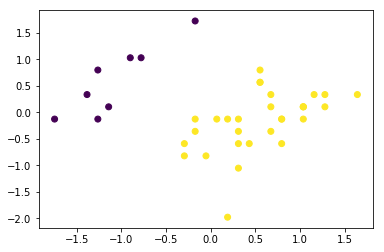

In [21]:
plt.scatter(test_X[:,:1], test_X[:,1:2], c=predictions)